# Classification and Regression Trees
### `! git clone https://github.com/ds4e/trees`

## Trees
- We've looked at three models -- $k$-NN, $k$-means clustering, linear models -- that each offer different approaches to machine learning
- Now we'll consider is called a *classification/regression tree* or often a *decision tree*, a supervised learning algorithm for regression and classification
- To me they feel like a combination of all the previous methods that is intended to accommodate highly non-linear relationships in high-dimensional or highly categorical data
- Later, a group of trees built in a stochastic way becomes a random forest, so it's worth understanding how trees work in some detail 

## Trees
- There are $N$ observations of data $X$ and outcomes $y$ (supervised learning: same setup as $k$-NN and linear models)
- We want to use $X$ to predict $\hat{y}$ for future cases $\hat{x}$
- A *classification/regression/decision tree* is
  1. A set of *decision nodes* that represent decision points
  2. A set of edges that represent *choices* at each decision node (data-driven choices)
  3. A set of *terminal nodes* or *outcomes* at the bottom of the tree (predictions or courses of action)
- The goal is to build a tree from data that predicts outcomes (classification or regression) for future cases
- Some people get frisky about whether it's called a *decision tree* or a *classification/regression tree*; I suppose they have a point. Unfortunately, CART is a "branded" acronym and "tree" might be too vague. 

## Example: Divorce Data
- There are 54 questions, with Likert-scale-type 0--4 response values (0=Strongly Agree, 1=Agree, 2=Neutral, 3=Disagree, 4=Never), and an outcome of divorce/married
- You *could* make this into a linear model by interacting all of the pairs and triples and tuples of the questions together, but it would be wildly overfit and uninterpretable. It's unclear what $k$-NN would be doing, since the "distances" are arbitrary and using the Euclidean distance would weight all of the questions equally (some are pretty trivial)
- Instead, you can fit a decision tree to predict marriage outcomes on the basis of the questions, which seems much more natural and reliable
- In diagnostic settings, this is extremely popular

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/divorce/divorce_data.csv',sep=';') # Load divorce data
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


[Text(0.6666666666666666, 0.875, 'x[17] <= 1.5\ngini = 0.5\nsamples = 170\nvalue = [86, 84]'),
 Text(0.5, 0.625, 'x[25] <= 1.5\ngini = 0.065\nsamples = 89\nvalue = [86, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[39] <= 2.5\ngini = 0.023\nsamples = 87\nvalue = [86, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 86\nvalue = [86, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 81\nvalue = [0, 81]'),
 Text(0.75, 0.75, '  False')]

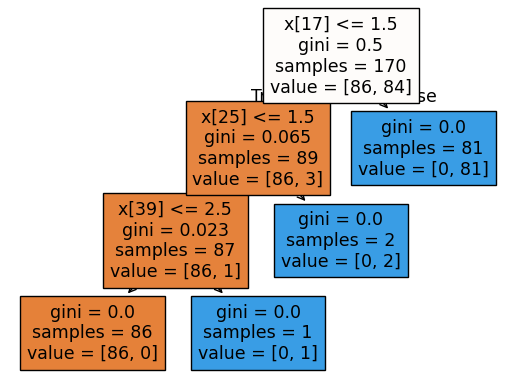

In [68]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Process data:
y = df['Divorce'] # Target variable
X = df.drop(['Divorce'], axis=1) # Features/predictors

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X, y) # Fit the classifier

# Visualize results:
plot_tree(cart,filled=True) 

## Selected Questions
- Decision trees are typically represented with a *dendrogram*, the plot on the previous slide; these are a popular way of visualizing hierarchical or acyclic relationships:
    - 18. My spouse and I have similar ideas about how marriage should be (High value/"Never" predicts divorce)
    - 26. I know my spouse's basic concerns. (High value/"Never" predicts divorce)
    - 40. We are just starting a fight before I know what is going on. (High value/"Never" predicts divorce)
- Seems about right? Maybe the last question is overfitting?

## Did it "work"?
- Before we go under the hood of the algorithm, we might want to think a bit about what "good performance" means
- Like with $k$-MC or $k$-NN, this is a greedy kind of algorithm: Left to its own devices, it searches for a perfect split of the data, where the terminal nodes are as pure as possible in terms of classification
- In practice, this often means that it is a perfect predictor on the training data
- In situations like this, we are in the familiar situation of having to split into training and testing data in order to be able to make sense of the question, "How well is the algorithm performing?"

## The Confusion Matrix
- The analog of regression residuals for classification is, roughly the **confusion matrix**
-  We cross tabulate the actual values for 

|  | Predicted Negative | Predicted Positive|
| :---: | :---:| :---: |
| Actual Negative | True Negative (TN) | False Positive (FP) |
| Actual Positive | False Negative (FN) | True Positive (TP) |

- The simplest metric of success with a confusion table is **Accuracy**: The proportion of predictions that were correct, or
$$ \text{Accuracy} = \dfrac{TN+TP}{TN+FP+FN+TP} = \dfrac{TN+TP}{N} $$

In [69]:
## Splitting the Sample into Train/Test Sets:
from sklearn.model_selection import train_test_split

## Preprocess Data:
y = df['Divorce']
X = df.drop(['Divorce'], axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

## Fit the Model:
from sklearn import tree # Import the tree classifier
cart = tree.DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.9117647058823529 



col_0,0,1
Divorce,,
0,15,1
1,2,16


## Performance
- Since the first question is so diagnostically powerful, the accuracy of the tree is around 91.2%
- If the performance of the tree was unsatisfactory on the test set, there are things we could do:
    - If we think the tree is overfitting, we could truncate the tree and limit its depth, so that it isn't making splits on very fine distinctions among a handful of observations 
    - If we think the tree is underfitting, we could program it to avoid making splits that make the subsequent populations too pure, so that it has to use more questions and provide a richer and more complex tree
- This is a funny case in which I think both criticisms probably apply? 

## Examples
- Diagnostic tests in medical settings (symptoms/test results $\rightarrow$ diagnosis; doctors love trees)
- Any situation where most of the data are mostly categorical rather than numeric
- High-dimensional data where variable selection for linear model is too difficult or where the arbitrariness of the distance metric in $k$-NN is a concern

# Growing a Tree

## Splits
- How do we build a tree?
- To understand the mechanics of building a tree, we need to think about "splitting" data into groups, and then evaluating whether the split is "good" or not
- In the divorce situation, imagine you are trying to use a particular question, say $Q18$, to split the respondents $i = 1, ..., N$ into two groups: Those who divorce, and those who don't
- As you vary the cutoff response from 1 to 3, you break the $N$ respondents into two groups: Those strictly below the cutoff and those weakly above it
    - Cutoff at 1: $\{0\}$ and $\{1, 2, 3, 4\}$
    - Cutoff at 2: $\{0,1\}$ and $\{2,3,4\}$
    - Cutoff at 3: $\{0,1,2\}$ and $\{3,4\}$
    - Cutoff at 4: $\{0,1,2,3\}$ and $\{4\}$
- Let's look at the frequencies of outcomes across the range of the explanatory variable. Take $Q18$, for example:

In [70]:
pd.crosstab(y,X.iloc[:,17]) # Notice .iloc, not .loc

Q18,0,1,2,3,4
Divorce,,,,,
0,78,8,0,0,0
1,1,2,16,44,21


## Splits
- As you vary the cutoff, what is the proportion of couples strictly below and weakly above the cutoff that divorce?
  - With a cutoff of 1, the divorce proportion for 0's is $1/79= .013$, but for $\{1,2,3,4\}$ it's $83/91 = .912$.
  - With a cutoff of 2, the divorce proportion for $\{0,1\}$ is $3/89=.034$, but for $\{2,3,4\}$ it's $81/81=1$.
  - With a cutoff of 3, the divorce proportion for $\{0,1,2\}$ is $19/105=.181$, but for $\{3,4\}$ it's $65/65=1$.
  - With a cutoff of 4, the divorce proportion for $\{0,1,2,3\}$ is $63/149=.423$, but for $\{4\}$ it's $21/21=1$.
- Which splits result in two groups are "most alike"? Which are "most different"?

## Mixing
- What we want is to create groups that are "as different as possible" from each other --- ideally, one group would have 0% divorces and the other would have 100% divorces: That's a perfect predictor
- We often use the word "purity/impurity" to describe whether the resulting groups are relatively extreme ("pure," 0,1) or mixed ("impure," $ \approx 1/2$)
- What we do not want is groups that have similar proportions to one another: If one group is 50% and the other is 50%, our predictor/split is not distinguishing the two groups at all
- So our "ideal error" curve would be largest and single-peaked at 1/2, 0 at 0, 0 at 1, and otherwise smooth/continuous. $x(1-x)$ is the easiest way to do this:

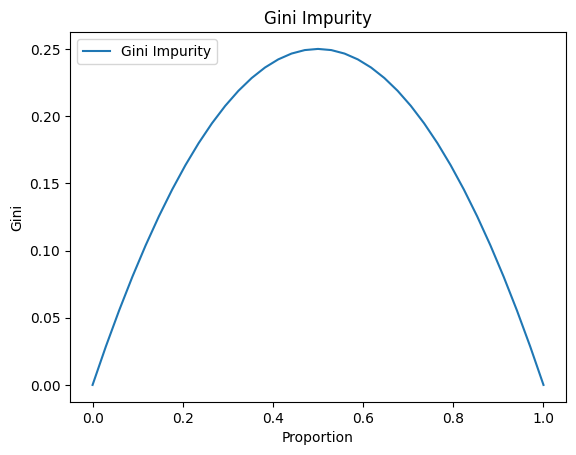

In [71]:
x = np.linspace(0,1,35)
y = x*(1-x)

plt.plot(x,y, label ='Gini Impurity')
plt.xlabel("Proportion")
plt.ylabel("Gini")
plt.legend(loc='upper left')
plt.title('Gini Impurity')
plt.show()

## Gini Impurity
- For each group $g$ created by the split, we compute the proportion of divorces, $p_g$, compute $p_g(1-p_g)$, and sum over the groups $g$:

    - .013*(1-.013) + .912*(1-.912) # Split into {0}, {1,2,3,4}
    - .034*(1-.034) + 1*(1-1) # Split into {0,1}, {2,3,4}
    - .181*(1-.181) + 1*(1-1) # Split into {0,1,2}, {3,4}
    - .423*(1-.423) + 1*(1-1) # Split into {0,1,3,4}, {4}

- The split with the lowest Gini impurity is 2 --- the first split in the decision tree at the beginning of the lecture

In [72]:
s1 = .013*(1-.013) + .912*(1-.912) # Split into {0}, {1,2,3,4}
s2 = .034*(1-.034) + 1*(1-1) # Split into {0,1}, {2,3,4}
s3 = .181*(1-.181) + 1*(1-1) # Split into {0,1,2}, {3,4}
s4 = .423*(1-.423) + 1*(1-1) # Split into {0,1,3,4}, {4}
print(s1,s2,s3,s4)

0.09308699999999996 0.032844 0.14823899999999998 0.24407099999999998


## The Divorce Example: Subsequent Splits
- If $Q18$ is greater than 2, all of those couples get divorced --- there's no further learning to do
- If $Q18$ is strictly less than 2, there are divorces, and we repeat the process, splitting the subpopulation to minimize Gini impurity
- $Q26$ is the next question that is optimal to split on, but in principle we would look at all the possible variables (including ones previously used)

In [73]:
y = df['Divorce']
X = df.drop(['Divorce'], axis=1)

pd.crosstab( y[X['Q17']<2], X.loc[X['Q18']<2,'Q26'] )

Q26,0,1,2
Divorce,,,
0,68,17,0
1,1,0,1


In [74]:
y_k = y[X['Q18']<2]

for k in range( X.shape[1]) : 
        X_k = X[X['Q18']<2].iloc[:,k]
        print(pd.crosstab( y_k, X_k ), '\n')

Q1        0  1  2  3  4
Divorce                
0        68  8  6  2  2
1         1  0  2  0  0 

Q2        0   1  2  3
Divorce              
0        57  21  5  3
1         1   0  2  0 

Q3        0   1   2  3  4
Divorce                  
0        51  20  11  3  1
1         0   2   0  0  1 

Q4        0  1  2  4
Divorce             
0        73  9  1  3
1         1  2  0  0 

Q5        0  1  2
Divorce          
0        79  5  2
1         2  1  0 

Q6        0   1  2  4
Divorce              
0        64  14  7  1
1         1   1  1  0 

Q7        0  1
Divorce       
0        85  1
1         3  0 

Q8        0  1  2
Divorce          
0        77  7  2
1         3  0  0 

Q9        0  1
Divorce       
0        81  5
1         3  0 

Q10       0   1  2
Divorce           
0        60  17  9
1         2   1  0 

Q11       0   1
Divorce        
0        69  17
1         2   1 

Q12       0   1  2
Divorce           
0        56  26  4
1         1   1  1 

Q13       0   1  2  3
Divorce       

- We can look through our remaining predictors to determine if there is one that can best further split the sub-population
- This iterative process creates a multi-step prediction algorithm, called a *classification/regression tree* or *decision tree*

# Regression

## Regression Trees and Numeric Regressors
- What if the outcome, $y$, is numeric rather than categorical?
- Trees can work really well for regression as well: Don't mistake my enthusiasm for classification applications to mean that they're not useful for regression as well
- We can use the MSE/SSE on either side of the split to choose where to split:

  1. Pick a split point, $s$ for the predictor/regressor $x$
  2. On either side of the split, compute the mean values of the outcome, $\bar{y}_L(s)$ and $\bar{y}_R(s)$
  3. Compute the SSE for the split $s$:
$$
\text{SSE}(s) = \sum_{x<s} (y(x) - \bar{y}_L(s))^2 + \sum_{x \ge s} (y(x)-\bar{y}_R(s))^2
$$
  4. Choose $s$ to minimize `SSE(s)`

- As we move down the tree, the goal is to reduce the `SSE` along each split/path; stopping rules become critical with numeric outcomes  
- Likewise, this allows the split variable $s$ to be numeric or categorical: Minimization over its values is typically easy to do (e.g. Assignment 1)

## A Regression Example
- We can regress prices on apartment features using the AirBnB data
- The goal is to illustrate regression using trees: They're not just for classification, even if they excel at that task

In [75]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

df = pd.read_csv('./data/airbnb_hw.csv') # Load airbnb data
df['Price'] = pd.to_numeric(df['Price'].str.replace(',',''), errors='coerce') # Clean price
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


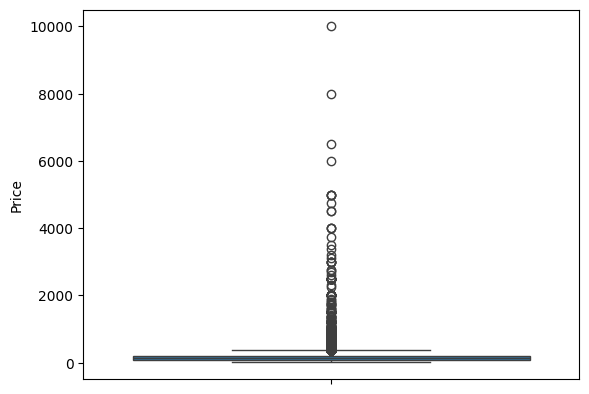

<Axes: ylabel='Price'>

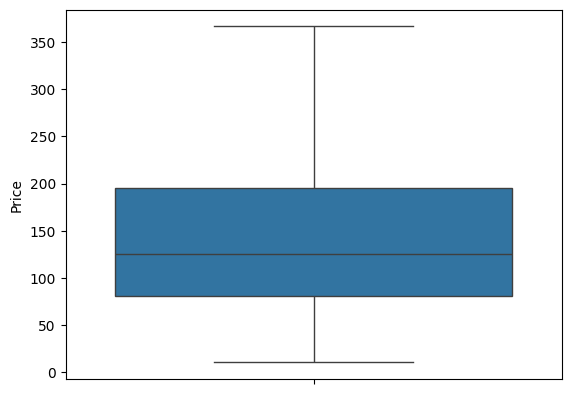

In [76]:
sns.boxplot(df['Price'])
plt.show()

def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['Price'] = winsorize(df['Price']) # Winsorize x?
sns.boxplot(df['Price'])


count    30478.000000
mean       147.960234
std         85.055889
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max        367.000000
Name: Price, dtype: float64


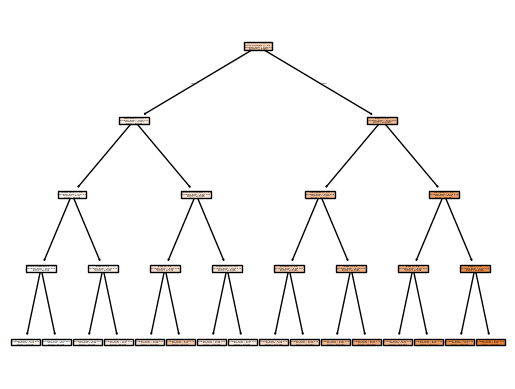

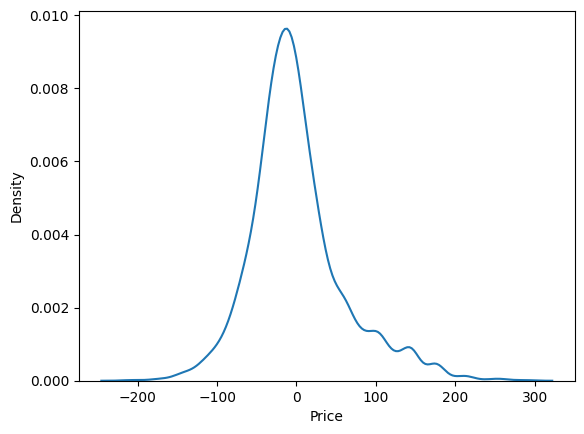

Rsq:  0.5218897073969619 

RMSE:  59.542867051340195 



In [77]:
# Process data:
y = df['Price'] 
#y =  np.log(df['Price']) # Compare with log version
print(y.describe())

# Dummy variables:
type_dummy = pd.get_dummies(df['Property Type'])
room_dummy = pd.get_dummies(df['Room Type'])
nbhd_dummy = pd.get_dummies(df['Neighbourhood '])

vars = ['Beds','Number Of Reviews']
X = pd.concat([df.loc[:,vars], type_dummy, nbhd_dummy, room_dummy],axis=1)

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 4) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression
var_names = cart.feature_names_in_

# Visualize results:
plot_tree(cart,filled=True,feature_names=var_names) 
plt.show()

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Residuals, Rsq, RMSE
e = y_test - y_hat
sns.kdeplot(e) # Notice the residuals aren't centered around zero
plt.show()
rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')


- This code chunk generates the splitting logic for the first split:

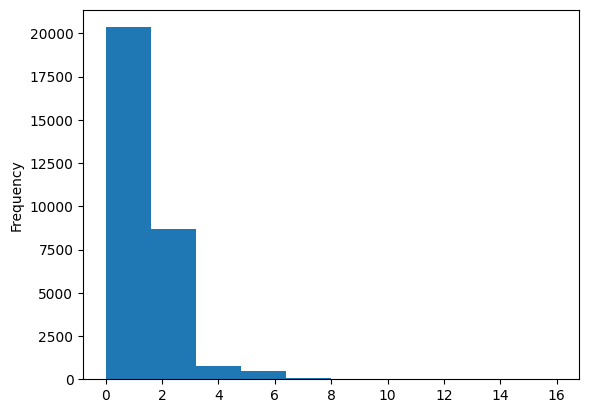

[Text(0.5, 1.0, 'Regression Splitting on Beds'),
 Text(0.5, 0, 'SplitValue'),
 Text(0, 0.5, 'RMSE')]

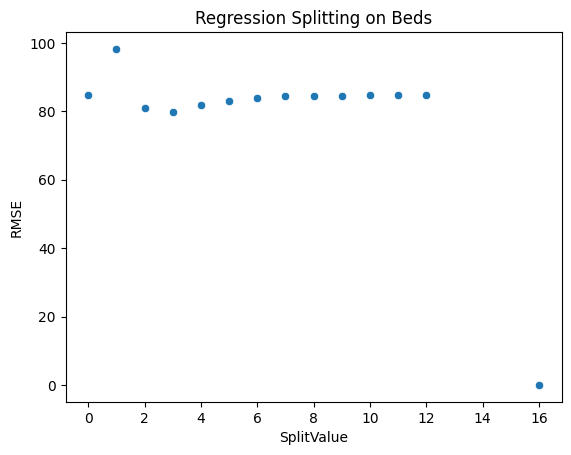

In [78]:
x = X.iloc[:,0] # Number of Beds
x.plot.hist()
plt.show()

def error(split,x,y):
    """ Computes SSE for a numeric split. """
    mean_L = np.mean( y[x<=split] ) # Mean on the left of the split
    mean_R = np.mean( y[x>split] ) # Mean on the right of the split
    MSE = (1/len(y))*( np.sum( (x<split) * (y-mean_L)**2 + (x>=split) * (y-mean_R)**2 ) ) # Compute MSE
    RMSE = np.sqrt(MSE)
    return RMSE

RMSE = [ error(s,x,y) for s in x.unique() ] # List comprehension to compute SSE

sns.scatterplot(x=x.unique(),y=RMSE).set(title='Regression Splitting on Beds', xlabel='SplitValue', ylabel = 'RMSE')

## Growing Decision Trees: How to Fit
- Building the predictive model iterates on the previous steps. This is roughly called the Iterative Dichotomizer (ID3) algorithm:
  1. For all of the variables, determine the split for each that minimizes impurity
  2. Pick the variable that achieves the lowest impurity overall --- this creates a single split in the tree. (We might use this variable again to build the tree.)
  3. Repeat steps 1 and 2 *for each of the sub-populations created by our previous splits* until the impurity is 0 for the remaining sub-populations (they are perfectly separated by outcome)

# Early Stopping Rules

## Stopping Rules
- Overfitting with trees is really common, and the structure of trees provides a variety of strategies to avoid overfit models:
  - Impose a limit on the depth of the tree: The maximum length of a path from the top to the bottom (`max_depth`)
  - Impose a lower bound on the impurity that can appear at a terminal node: Don't allow the terminal nodes to be "too pure" (`min_impurity_decrease`)
  - Impose a limit on how few cases can appear at a terminal node: Don't allow the terminal nodes to be "too small" (`min_samples_leaf`)
- Imposing a constraint on the max depth is the easiest thing to do: It imposes a hard limit on how many levels the tree can have, but often leads to a very "symmetric" and often flawed predictor
- Constraining the min impurity or min samples per leaf, instead, allow the tree to go deep when the data are very discerning of the outcome, but also shallow when the data isn't very helpful for differentiating outcomes in $y$ 
- Early stopping is a form of **regularization**: Imposing constraints on the model to force it not to overfit 

Accuracy:  0.9117647058823529 



[Text(0.6, 0.8333333333333334, 'x[17] <= 1.5\ngini = 0.5\nsamples = 136\nvalue = [70, 66]'),
 Text(0.4, 0.5, 'x[42] <= 1.5\ngini = 0.028\nsamples = 71\nvalue = [70, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 61\nvalue = [61, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 65\nvalue = [0, 65]'),
 Text(0.7, 0.6666666666666667, '  False')]

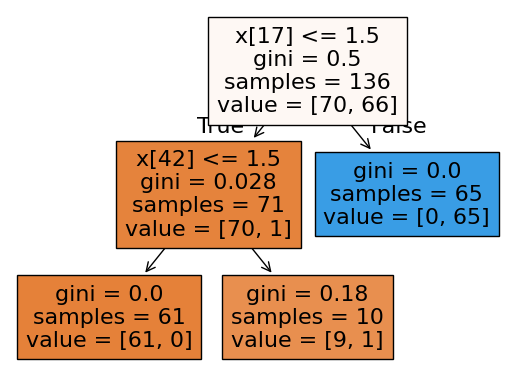

In [79]:
## Fit the Model:
from sklearn import tree # Import the tree classifier
df = pd.read_csv('./data/divorce/divorce_data.csv',sep=';') # Load divorce data

df = df.drop('Q18',axis=1)

## Preprocess Data:
y = df['Divorce']
X = df.drop(['Divorce'], axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

cart = tree.DecisionTreeClassifier(min_samples_leaf = 10) # Create a classifier object
#cart = tree.DecisionTreeClassifier(min_impurity_decrease= .3) # Create a classifier object
#cart = tree.DecisionTreeClassifier()

## Make Predictions on the Test Set:
cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

# Visualize results:
plot_tree(cart,filled=True) 

Rsq  :  0.23681264399837554 



[Text(0.5107142857142857, 0.9545454545454546, 'x[26] <= 0.5\nsquared_error = 41144.382\nsamples = 24382\nvalue = 163.368'),
 Text(0.24285714285714285, 0.8636363636363636, 'x[23] <= 0.5\nsquared_error = 4488.278\nsamples = 10817\nvalue = 90.814'),
 Text(0.3767857142857143, 0.9090909090909092, 'True  '),
 Text(0.14285714285714285, 0.7727272727272727, 'x[0] <= 1.5\nsquared_error = 2586.209\nsamples = 6182\nvalue = 77.418'),
 Text(0.11428571428571428, 0.6818181818181818, 'x[22] <= 0.5\nsquared_error = 1335.626\nsamples = 5372\nvalue = 75.581'),
 Text(0.05714285714285714, 0.5909090909090909, 'x[1] <= 1.5\nsquared_error = 1085.855\nsamples = 1174\nvalue = 69.316'),
 Text(0.02857142857142857, 0.5, 'squared_error = 1892.65\nsamples = 525\nvalue = 73.941'),
 Text(0.08571428571428572, 0.5, 'squared_error = 401.909\nsamples = 649\nvalue = 65.575'),
 Text(0.17142857142857143, 0.5909090909090909, 'x[2] <= 0.5\nsquared_error = 1391.432\nsamples = 4198\nvalue = 77.333'),
 Text(0.14285714285714285, 0.

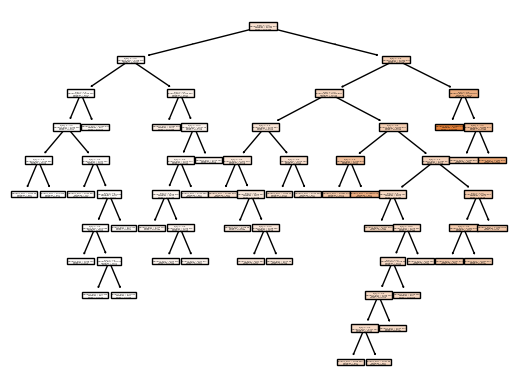

In [80]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

df = pd.read_csv('./data/airbnb_hw.csv') # Load airbnb data
df['Price'] = pd.to_numeric(df['Price'].str.replace(',',''), errors='coerce') # Clean price
df.head()

# Process data:
y = df['Price'] 
#y =  np.log(df['Price']) # Compare with and without logs

# Dummy variables:
type_dummy = pd.get_dummies(df['Property Type'])
room_dummy = pd.get_dummies(df['Room Type'])
nbhd_dummy = pd.get_dummies(df['Neighbourhood '])

vars = ['Beds','Number Of Reviews']
X = pd.concat([df.loc[:,vars], type_dummy, nbhd_dummy, room_dummy],axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

#cart = tree.DecisionTreeRegressor(max_depth=5)
cart = tree.DecisionTreeRegressor(min_samples_leaf = 500)

cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)
print('Rsq  : ', cart.score(X_test, y_test), '\n')
plot_tree(cart,filled=True) 

Rsq  :  0.014568312550717777 



[Text(0.4444444444444444, 0.9166666666666666, 'x[4] <= 27.5\nsquared_error = 0.209\nsamples = 239\nvalue = 0.297'),
 Text(0.2222222222222222, 0.75, 'x[2] <= 221.5\nsquared_error = 0.222\nsamples = 45\nvalue = 0.667'),
 Text(0.3333333333333333, 0.8333333333333333, 'True  '),
 Text(0.1111111111111111, 0.5833333333333334, 'squared_error = 0.248\nsamples = 20\nvalue = 0.55'),
 Text(0.3333333333333333, 0.5833333333333334, 'squared_error = 0.182\nsamples = 25\nvalue = 0.76'),
 Text(0.6666666666666666, 0.75, 'x[7] <= 1.45\nsquared_error = 0.167\nsamples = 194\nvalue = 0.211'),
 Text(0.5555555555555556, 0.8333333333333333, '  False'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[0] <= 67.5\nsquared_error = 0.116\nsamples = 157\nvalue = 0.134'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[6] <= 313500.0\nsquared_error = 0.057\nsamples = 116\nvalue = 0.06'),
 Text(0.2222222222222222, 0.25, 'x[6] <= 209000.0\nsquared_error = 0.032\nsamples = 90\nvalue = 0.033'),
 Text(0.1111111111111111,

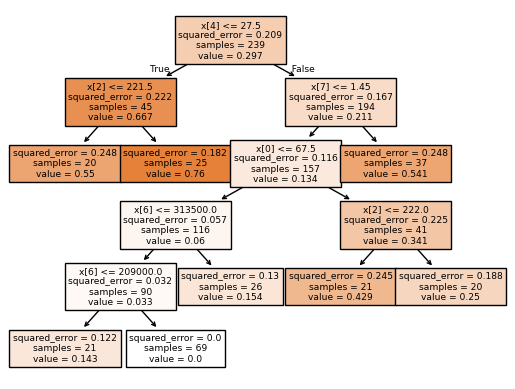

In [81]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

df = pd.read_csv('./data/heart_failure/heart_failure_clinical_records_dataset.csv')

y = df['DEATH_EVENT']
vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium',]
X = df.loc[:,vars]

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

#cart = tree.DecisionTreeRegressor(max_depth=3,random_state=100)
cart = tree.DecisionTreeRegressor(min_samples_leaf=20,random_state=500)

## Make Predictions on the Test Set:
cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)
print('Rsq  : ', cart.score(X_test, y_test), '\n')
plot_tree(cart,filled=True) 

Accuracy  :  0.7333333333333333 

col_0         0   1
DEATH_EVENT        
0            29   6
1            10  15


[Text(0.5833333333333334, 0.9375, 'x[7] <= 1.65\ngini = 0.418\nsamples = 239\nvalue = [168, 71]'),
 Text(0.3333333333333333, 0.8125, 'x[4] <= 27.5\ngini = 0.333\nsamples = 194\nvalue = [153, 41]'),
 Text(0.45833333333333337, 0.875, 'True  '),
 Text(0.25, 0.6875, 'gini = 0.49\nsamples = 28\nvalue = [12, 16]'),
 Text(0.4166666666666667, 0.6875, 'x[0] <= 74.0\ngini = 0.256\nsamples = 166\nvalue = [141.0, 25.0]'),
 Text(0.3333333333333333, 0.5625, 'x[7] <= 1.25\ngini = 0.193\nsamples = 148\nvalue = [132, 16]'),
 Text(0.25, 0.4375, 'x[6] <= 318000.0\ngini = 0.144\nsamples = 128\nvalue = [118, 10]'),
 Text(0.16666666666666666, 0.3125, 'x[6] <= 193000.0\ngini = 0.095\nsamples = 100\nvalue = [95, 5]'),
 Text(0.08333333333333333, 0.1875, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.25, 0.1875, 'x[6] <= 282000.0\ngini = 0.025\nsamples = 78\nvalue = [77, 1]'),
 Text(0.16666666666666666, 0.0625, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]'),
 Text(0.3333333333333333, 0.0625, 'gini = 0.11

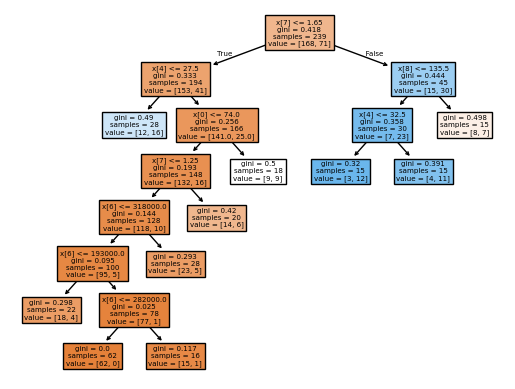

In [82]:
cart = tree.DecisionTreeClassifier(min_samples_leaf = 15) # Create a classifier object
#cart = tree.DecisionTreeClassifier(min_impurity_decrease= .01) # Create a classifier object
#cart = tree.DecisionTreeClassifier(max_depth = 4) # Create a classifier object

cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)

## Confusion Matrix:
print('Accuracy  : ', cart.score(X_test, y_test), '\n')
print(pd.crosstab(y_test,y_hat))
plot_tree(cart,filled=True)

# Classification, Multiple Outcomes

## Classification with Multiple Outcomes
- In our example, Divorce was binary; in many situations, the outcome might have many categorical possibilities (species of animal, type of landmine, non-cancerous/benign/malignant, bond ratings, etc.)
- In this case, we add additional terms to the impurity measure that correspond to each category
- Imagine a split creates groups $g=1, 2, ..., G$ over the categories $j=1, 2, ..., J$. Let $p_{jg}$ be the proportion of outcomes in group $g$ that take the value $j$
- For each of the groups $g$ created by the split and each of the categories $j$ that occur in the target/outcome/dependent variable, we compute the Gini impurity $p_{jg}(1-p_{jg})$, then we sum over all groups and categories.
- Formally, we split to minimize cross impurity:
$$
\sum_{g=1}^G \sum_{j =1}^J p_{jg}(1-p_{jg})
$$

     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  
Accuracy  :  0.8387096774193549 

col_0   1  

[Text(0.6666666666666666, 0.875, 'x[3] <= 0.5\ngini = 0.76\nsamples = 70\nvalue = [29.0, 13.0, 4.0, 8.0, 4.0, 6.0, 6.0]'),
 Text(0.5, 0.625, 'x[1] <= 0.5\ngini = 0.8\nsamples = 41\nvalue = [0, 13, 4, 8, 4, 6, 6]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[8] <= 0.5\ngini = 0.786\nsamples = 28\nvalue = [0, 0, 4, 8, 4, 6, 6]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.5\nsamples = 12\nvalue = [0, 0, 0, 0, 0, 6, 6]'),
 Text(0.5, 0.125, 'gini = 0.625\nsamples = 16\nvalue = [0, 0, 4, 8, 4, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.75, '  False')]

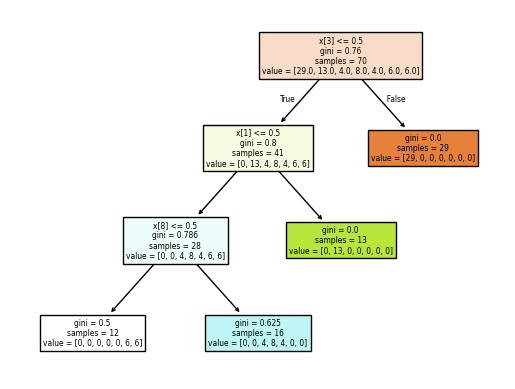

In [83]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

df = pd.read_csv('./data/zoo.csv')
print(df.head())

y = df['class']
X = df.drop(['class','animal'],axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=104)

#cart = tree.DecisionTreeClassifier(random_state=100)
cart = tree.DecisionTreeClassifier(min_samples_leaf=10,random_state=100)

## Confusion Matrix:
cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)
print('Accuracy  : ', cart.score(X_test, y_test), '\n')
print(pd.crosstab(y_test,y_hat))
plot_tree(cart,filled=True)

- Here's the first split, by whether the species produces milk or not:

In [84]:
pd.crosstab(X.iloc[:,3],y)

class,1,2,3,4,5,6,7
milk,,,,,,,
0,0,20,5,13,4,8,10
1,41,0,0,0,0,0,0


- Mammals detected

    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
Accuracy  :  0.5 

col_0       1   2  3  4   5
mine_type                  
1          16   0  0  1   7
2           0  13  2  1   0
3           4   3  2  7   7
4           3   3  1  8   6
5           2   1  0  3  12


[Text(0.6764705882352942, 0.9375, 'x[0] <= 0.618\ngini = 0.799\nsamples = 236\nvalue = [47, 54, 43, 45, 47]'),
 Text(0.47058823529411764, 0.8125, 'x[0] <= 0.338\ngini = 0.786\nsamples = 199\nvalue = [47, 19, 41, 45, 47]'),
 Text(0.5735294117647058, 0.875, 'True  '),
 Text(0.23529411764705882, 0.6875, 'x[0] <= 0.289\ngini = 0.669\nsamples = 93\nvalue = [44, 0, 8, 24, 17]'),
 Text(0.11764705882352941, 0.5625, 'x[2] <= 0.3\ngini = 0.483\nsamples = 38\nvalue = [24, 0, 1, 13, 0]'),
 Text(0.058823529411764705, 0.4375, 'gini = 0.117\nsamples = 16\nvalue = [15, 0, 1, 0, 0]'),
 Text(0.17647058823529413, 0.4375, 'x[0] <= 0.256\ngini = 0.483\nsamples = 22\nvalue = [9, 0, 0, 13, 0]'),
 Text(0.11764705882352941, 0.3125, 'gini = 0.298\nsamples = 11\nvalue = [2, 0, 0, 9, 0]'),
 Text(0.23529411764705882, 0.3125, 'gini = 0.463\nsamples = 11\nvalue = [7, 0, 0, 4, 0]'),
 Text(0.35294117647058826, 0.5625, 'x[1] <= 0.5\ngini = 0.716\nsamples = 55\nvalue = [20.0, 0.0, 7.0, 11.0, 17.0]'),
 Text(0.29411764705

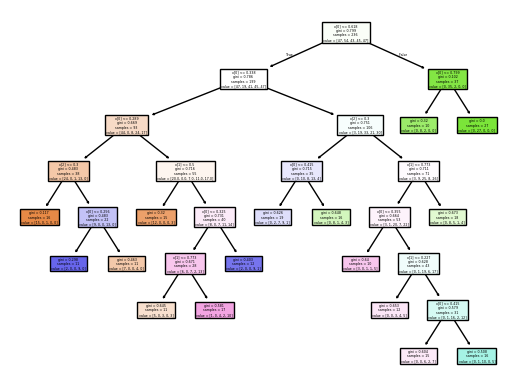

In [85]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

df = pd.read_csv('./data/land_mines.csv')
print(df.head())

y = df['mine_type']
X = df.drop('mine_type',axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=104)

#cart = tree.DecisionTreeClassifier(random_state=100)
#cart = tree.DecisionTreeClassifier(min_impurity_decrease=.1, random_state=100)
cart = tree.DecisionTreeClassifier(min_samples_leaf=10,random_state=100)

cart = cart.fit(X_train, y_train) # Fit the classifier

## Confusion Matrix:
y_hat = cart.predict(X_test)
print('Accuracy  : ', cart.score(X_test, y_test), '\n')
print(pd.crosstab(y_test,y_hat))
plot_tree(cart,filled=True)

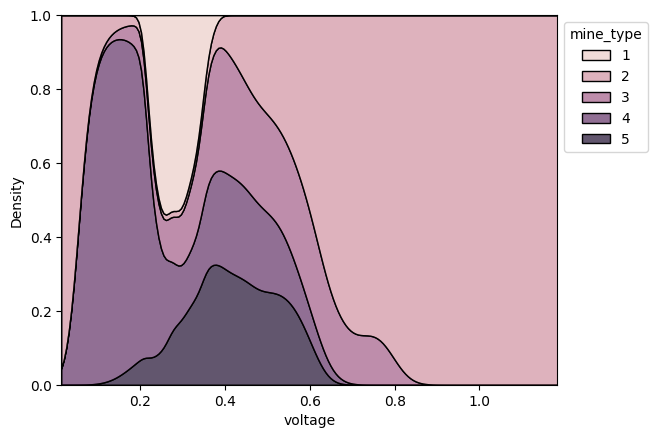

[Text(0.5, 1.0, 'Categorical Splitting on Voltage'),
 Text(0.5, 0, 'Split Value'),
 Text(0, 0.5, 'Impurity')]

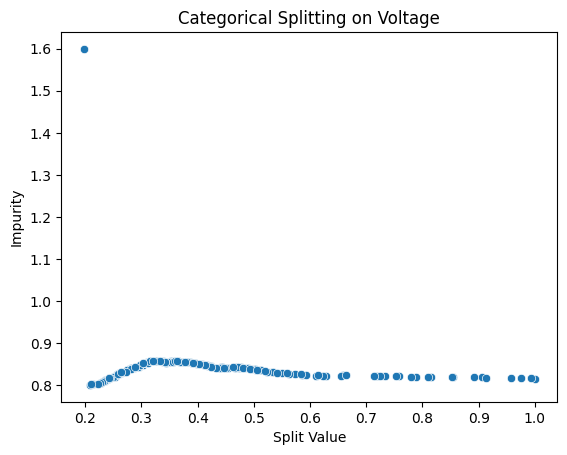

In [87]:
x = X.iloc[:,0]
y = df.loc[:,'mine_type']

ax = sns.kdeplot(x=x, hue= y, multiple='fill')
ax = sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

def categorical_error(split,x,y):
    """ Computes Gini impurity for a categorical split. """
    table_left = pd.crosstab(x<split,y)
    p = table_left.iloc[0,:]/len(y) #np.sum(table_left,axis=0)
    gini_left = np.sum( p*(1-p) )

    table_right = pd.crosstab(x>=split,y)
    p = table_right.iloc[0,:]/len(y) #np.sum(table_right,axis=0)
    gini_right = np.sum( p*(1-p) )

    gini = gini_left + gini_right
    
    return gini

impurity = [ categorical_error(s,x,y) for s in x.unique() ] # List comprehension to compute Gini impurity
sns.scatterplot(x=x.unique(),y=impurity).set(title='Categorical Splitting on Voltage', xlabel='Split Value', ylabel = 'Impurity')

# Other Details

## Entropy (An Alternative to Gini Impurity)
- There are, unsurprisingly, dozens of algorithms and approaches to creating decision-trees!
- The Gini Impurity is a completely valid way to approach the measurement of how "mixed" or "impure" a split is
- Many algorithms default to using *entropy* rather than $\sum_{g} p_g(1-p_g)$, defined as
$$
\sum_g - p_g \log_2(p_g)
$$
with the convention that $0 \log_2(0) = 0$. 
- Mathematically and practically, the Gini Impurity and Entropy Measures are very similar
- Entropy is a complex concept that tries to measure how much "disorder" there is in a system, or how much information you would need to describe its state; its additional mathematical properties motivate its use in decision trees

## Conclusion: Decision Trees
- There are dozens of variations on this concept (e.g. ID3, C4.5, CART)
- They express highly non-linear relationships between target variables and data: This can be an advantage in some situations over linear models
- Many people like how "interpretable" they are: This can be an advantage over $k$-NN
- They are famously sensitive to the data (a later algorithm, random forests, will address this problem)
- They are based on discrete splits --- this is simple but works very well on "chunky"/"unitless" data like the divorce Likert scale questions
- Prediction can be a challenge if the resulting model is "too simple" --- imagine a therapist asking two questions, telling you to get divorced, and asking for payment